# Necessary imports and globals

In [1]:
%matplotlib notebook

import numpy as np
import os
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags

BASE_PATH = './'  # @param
#GAMES = ['cars']  # @param
GAMES = ['breakout']  # @param

import matplotlib.pyplot as plt

In [2]:
NUM_OF_FOLDERS = 0
eval_str = "train"
# eval_str = "eval"

#archive
# folder_path = './LOGS_ARCHIVE/hierarchy -  breakout- original gin - 3 identical agents/LOGS{:d}/logs'

#original
# folder_path = "/home/deep7/hierarchy/Hierarchical-RL/LOGS_ARCHIVE/hierarchy -  breakout- original gin - 3 identical agents/LOGS{:d}/logs"
folder_path = './LOGS{:d}/logs'
for ii in range(1, 13):
    if os.path.isdir( folder_path.format(ii) ) == False:
        break
    else:
        NUM_OF_FOLDERS = ii

print("NUM_OF_FOLDERS", NUM_OF_FOLDERS)

raw_data = {}
for folder_number in range(1, NUM_OF_FOLDERS + 1):  
    raw_data[folder_number], _ = colab_utils.load_statistics(folder_path.format(folder_number), verbose=False)

('NUM_OF_FOLDERS', 1)


In [3]:
#num of sub agents
NUM_OF_AGENTS = 0 

action = 0

for agent in range( 20 ):
    try:
        name_of_data = '{}_agent_{:d}action_{:d}_hist'.format( eval_str, agent, action )
        summarized_data_two = colab_utils.summarize_data( raw_data[1], [name_of_data])
    except:
        NUM_OF_AGENTS = agent 
        break

print("NUM_OF_AGENTS", NUM_OF_AGENTS)

('NUM_OF_AGENTS', 2)


In [4]:
#num of sub agents
NUM_OF_ACTIONS = 0 

agent = 0

for action in range( 20 ):
    try:
        name_of_data = '{}_agent_{:d}action_{:d}_hist'.format( "train", agent, action )
        summarized_data_two = colab_utils.summarize_data( raw_data[1], [name_of_data])
    except:
        NUM_OF_ACTIONS = action 
        break

        
print("NUM_OF_ACTIONS", NUM_OF_ACTIONS)


('NUM_OF_ACTIONS', 4)


# Episode Rerurns

<IPython.core.display.Javascript object>


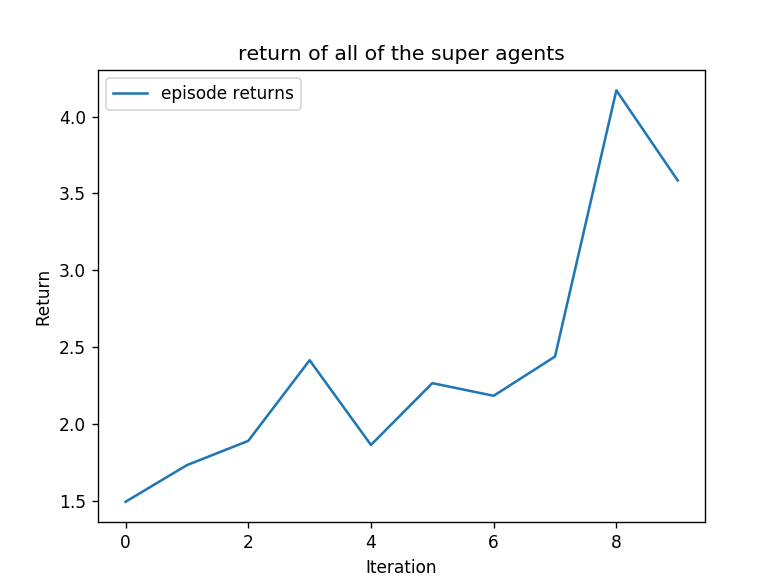

In [5]:
for game in GAMES:
    
    plt.figure()

    for i in range(1, NUM_OF_FOLDERS + 1):

        summarized_data = colab_utils.summarize_data(
                                                     raw_data[i],\
                                                     [eval_str + '_episode_returns']\
                                                    )
        plt.plot(summarized_data[eval_str + '_episode_returns'], label='episode returns')
        plt.xlabel('Iteration')
        plt.ylabel('Return')
        plt.legend()
        plt.title('return of all of the super agents')
    
    plt.show()

# Show Specific Statistics For Hierarchical Agent

### average return of each agent

<IPython.core.display.Javascript object>


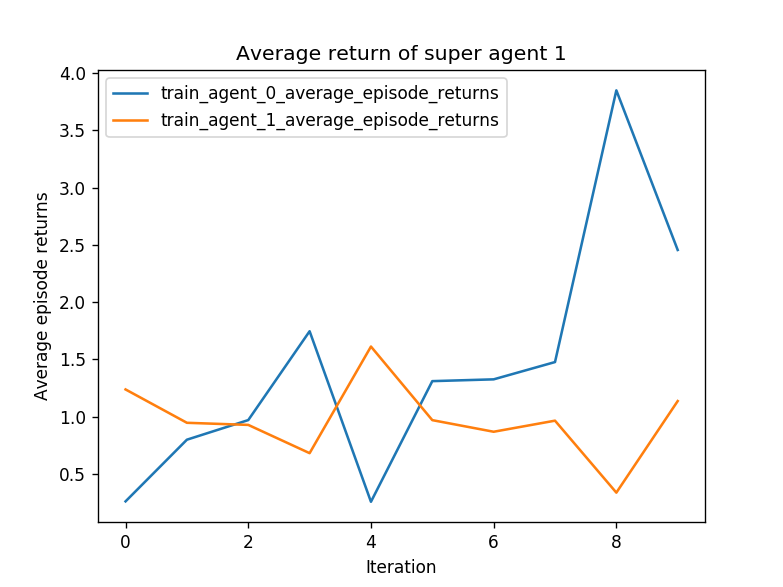

In [6]:
# TODO: we need to cancell the normalization.
#  train_episode_dqn_utilization


for i in range(1, NUM_OF_FOLDERS + 1):

    plt.figure()

    for j in range ( NUM_OF_AGENTS ):
        
        #get episode length 
        name_of_data = '{}_agent_{:d}_average_episode_returns'.format(eval_str, j)
        summarized_data_two = colab_utils.summarize_data( raw_data[i], [name_of_data])
        
        
        plt.plot( summarized_data_two[name_of_data] , label=name_of_data )
        
    plt.xlabel('Iteration')
    plt.ylabel('Average episode returns')
    plt.title( 'Average return of super agent {:d}'.format(i) )
    plt.legend()
    plt.show()

### Utilization precentage of each agent over one phase:

<IPython.core.display.Javascript object>


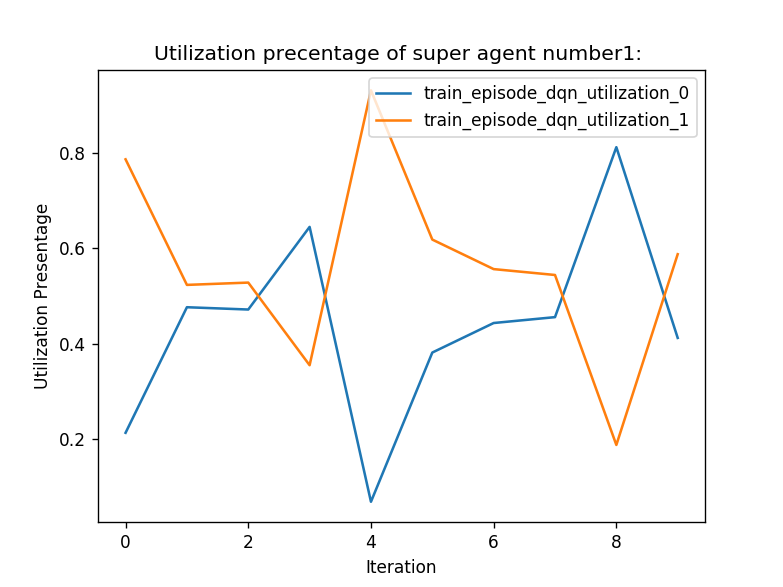

In [7]:
# TODO: we need to do the same for every supper agent.


for folder_number in range(1, NUM_OF_FOLDERS + 1):
    
    plt.figure()                                    

    for i in range(NUM_OF_AGENTS):

        name_of_data = eval_str + '_episode_dqn_utilization_' + str(i)
        summarized_data_two = colab_utils.summarize_data( raw_data[folder_number], [name_of_data])
        plt.plot( summarized_data_two[name_of_data], label=name_of_data )

    plt.xlabel('Iteration')
    plt.ylabel('Utilization Presentage')
    plt.title('Utilization precentage of super agent number{:d}: '.format(folder_number))
    plt.legend()
    plt.show()


### Action distribution of all sub agents

<IPython.core.display.Javascript object>


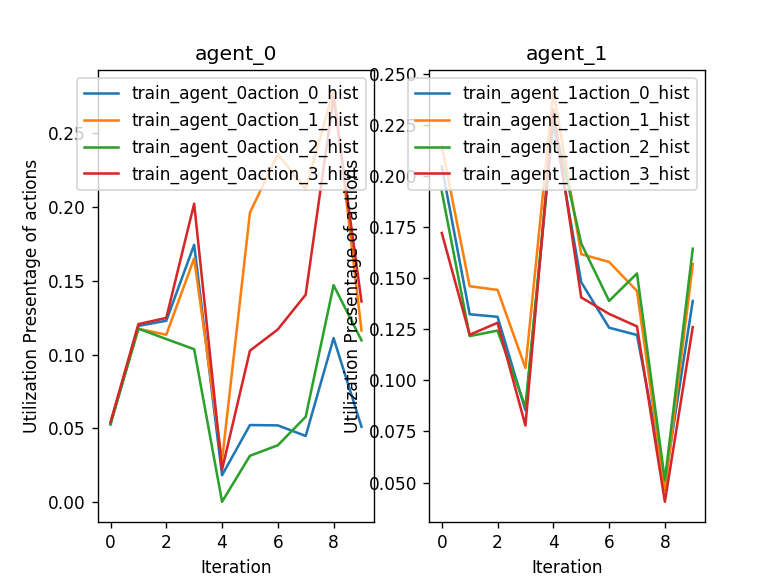

In [8]:
for folder_number in range(1, NUM_OF_FOLDERS + 1):
    
    plt.figure()
    for agent in range( 0, NUM_OF_AGENTS ):

        plt.subplot(1, NUM_OF_AGENTS, agent + 1)

        for action in range( NUM_OF_ACTIONS ):

            name_of_data = '{}_agent_{:d}action_{:d}_hist'.format( eval_str, agent, action )
            summarized_data_two = colab_utils.summarize_data( raw_data[folder_number], [name_of_data])
            plt.plot( summarized_data_two[name_of_data], label=name_of_data )

        plt.xlabel('Iteration')
        plt.ylabel('Utilization Presentage of actions')

        plt.legend()
        plt.title('agent_{:d}'.format(agent))
        plt.show()